In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

# supress warning
pd.options.mode.chained_assignment = None

# load data

In [2]:
# importing data and reading data from csv file
# Values have spaces at the beginning --> remove them with skipinitialspace
data = pd.read_csv('data/adult.csv', header = None, skipinitialspace = True)
# set headers
data.columns = ['age', 'workclass', "fnlwgt", "education", "education_num", "marital_status", "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss", "hours_per_week", "native_country", "income" ]
# show dataset
data.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


# describe dataset

In [3]:
# description of the dataset
pd.set_option("max_colwidth", None)
desc = ['Describes the age of individuals.','Different types of employment (e.g. State-gov, Never-worked).','If two samples have the same(or similar) fnlwgt they have similar characteristics, demographically speaking. They are not standardized across different states.',
       'Different types of academic degrees (e.g. Bachelor).','Number of years spent in education.','The distinct options that describe a person´s relationship with a significant other (e.g. Married).',
        'A job or profession (e.g. Sales, Tech-support).','The way in which two or more people or groups regard and behave towards each other (e.g. Wife, Husband).','Race of the person (e.g. White, Black).','Gender of the person (Male or Female).','Is the profit one earns on the sale of an asset like stocks.',
        'Loss incurred when a capital asset (e.g. a stock) decreases in value.','The time a person works per week.','Country of origin.','Annual salary.']
data_details = pd.DataFrame(list(zip(data.columns, desc)), columns =['Column', 'Description'])
data_details

,Column,Description
0,age,Describes the age of individuals.
1,workclass,"Different types of employment (e.g. State-gov, Never-worked)."
2,fnlwgt,"If two samples have the same(or similar) fnlwgt they have similar characteristics, demographically speaking. They are not standardized across different states."
3,education,Different types of academic degrees (e.g. Bachelor).
4,education_num,Number of years spent in education.
5,marital_status,The distinct options that describe a person´s relationship with a significant other (e.g. Married).
6,occupation,"A job or profession (e.g. Sales, Tech-support)."
7,relationship,"The way in which two or more people or groups regard and behave towards each other (e.g. Wife, Husband)."
8,race,"Race of the person (e.g. White, Black)."
9,sex,Gender of the person (Male or Female).


In [4]:
# 32561 rows, 15 columns
data.shape

(32561, 15)

In [5]:
# Check for Null Data
data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [6]:
# dataset has no NaNs but a lot of ?
data.select_dtypes(object).apply(lambda x: x.str.contains('?', regex=False)).sum()

workclass         1836
education            0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
native_country     583
income               0
dtype: int64

In [7]:
# Get data types
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [8]:
# show all duplicated entries of the dataset
print('Duplicated entries:', data.duplicated().sum())

Duplicated entries: 24


## visualization

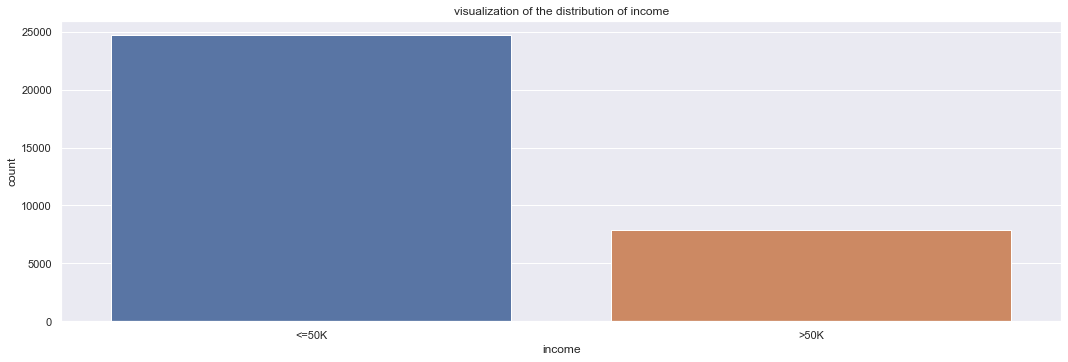

In [9]:
# visualization of the distribution of income
sns.set_theme(style="darkgrid")
plt.figure(figsize=(15,5))
sns.countplot(x="income", data=data)
plt.tight_layout()
plt.title('visualization of the distribution of income')
plt.show()

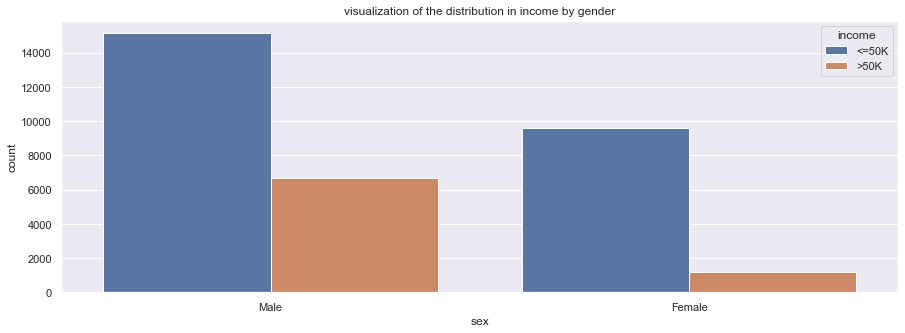

In [10]:
# visualization of the distribution in income by gender
plt.figure(figsize=(15,5))
sns.countplot(x="sex", hue='income', data=data)
plt.title('visualization of the distribution in income by gender')
plt.show()

In [11]:
#split age in different groups for visualization
data_age = []
def age_group(x):
    x = int(x)
    x = abs(x)
    if( 18 < x < 31 ):
        return "19-30"
    if( 30 < x < 41 ):
        return "31-40"
    if( 40 < x < 51 ):
        return "41-50"
    if( 50 < x < 61 ):
        return "51-60"
    if( 60 < x < 71 ):
        return "61-70"
    else:
        return "Greater than 70"

data_age = data['age'].apply(age_group)

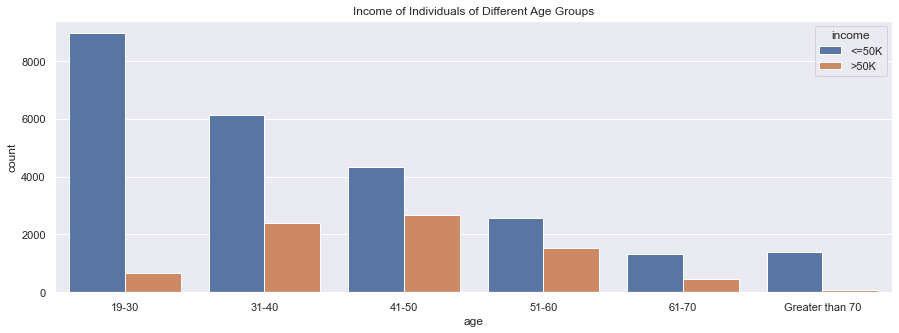

In [12]:
# visualization of the distribution in income by age group
plt.figure(figsize=(15,5))
order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
sns.countplot(x = data_age, hue = data['income'], order = order_list, data=data)
plt.title('Income of Individuals of Different Age Groups')
plt.show()

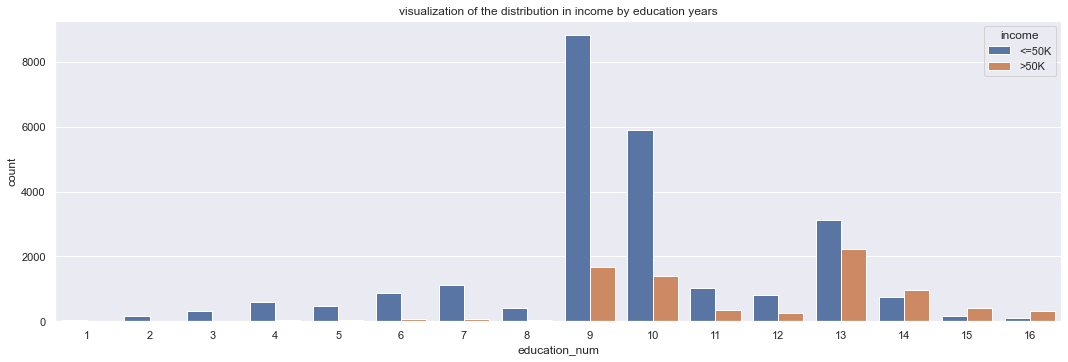

In [13]:
# visualization of the distribution in income by education years
plt.figure(figsize=(15,5))
sns.countplot(x = 'education_num', hue = 'income', data = data)
plt.tight_layout()
plt.title('visualization of the distribution in income by education years')
plt.show()

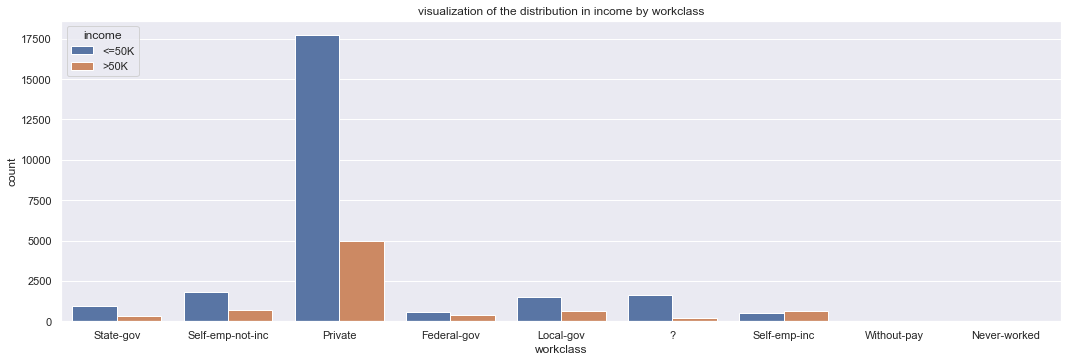

In [14]:
# visualization of the distribution in income by workclass
plt.figure(figsize=(15,5))
sns.countplot(x = 'workclass', hue = 'income', data = data)
plt.tight_layout()
plt.title('visualization of the distribution in income by workclass')
plt.show()

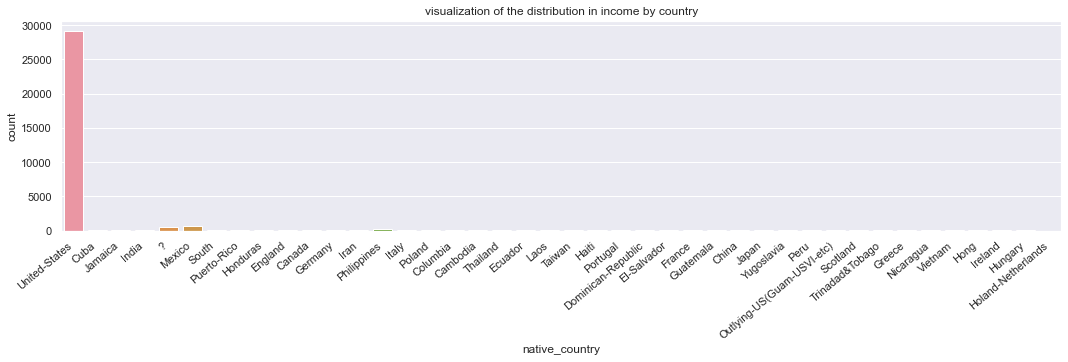

In [15]:
# visualization of the distribution in income by country
plt.figure(figsize=(15,5))
ax = sns.countplot(x = 'native_country', data = data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.title('visualization of the distribution in income by country')
plt.show()

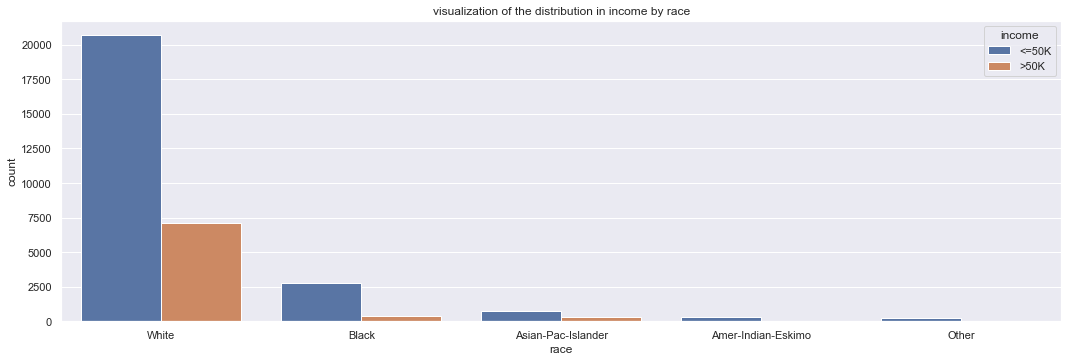

In [16]:
# visualization of the distribution in income by race
plt.figure(figsize=(15,5))
ax = sns.countplot(x = 'race', hue = 'income', data = data)
plt.tight_layout()
plt.title('visualization of the distribution in income by race')
plt.show()

# preprocess data

In [17]:
# replace ? with Nans
data = data.replace('?', np.NaN )

# Check again for null data
data.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

In [18]:
# remove 24 duplicates
data = data.drop_duplicates()
print('Duplicated entries: ', data.duplicated().sum())

Duplicated entries:  0


In [19]:
# closer look at the attributes capital_gain and capital_loss
print('capital gain: ', data.capital_gain.unique().shape)
print ('capital loss: ', data.capital_loss.unique().shape)
print (data.eq(0).sum())

capital gain:  (119,)
capital loss:  (92,)
age                   0
workclass             0
fnlwgt                0
education             0
education_num         0
marital_status        0
occupation            0
relationship          0
race                  0
sex                   0
capital_gain      29825
capital_loss      31018
hours_per_week        0
native_country        0
income                0
dtype: int64


In [20]:
# dropping  columns
# fnlwgt is removed as it has no predictive power since it is a feature aimed to allocate similar weights to people with similar demographic characteristics
# capital gain and capital loss are mostly 0
# education can be described by education-num 
data.drop(['fnlwgt', 'capital_gain', 'capital_loss', 'education'], axis=1, inplace=True)
data.shape

(32537, 11)

## approach 1: drop rows with na values

In [21]:
# drop Na-Values
data_dropped = data.dropna(how='any')

# reset index after dropping rows
data_dropped = data_dropped.reset_index(drop=True)

# overview of the current data_dropped
print(data_dropped.isna().sum())
print(data_dropped.shape)

age               0
workclass         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
hours_per_week    0
native_country    0
income            0
dtype: int64
(30139, 11)


## approach 2: replace na values with respective mode

In [22]:
data.isnull().sum(axis = 0)

age                  0
workclass         1836
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
hours_per_week       0
native_country     582
income               0
dtype: int64

In [23]:
# closer look at occupation
print(data['occupation'].describe())
data['occupation'] = data['occupation'].fillna('Prof-specialty')

count              30694
unique                14
top       Prof-specialty
freq                4136
Name: occupation, dtype: object


In [24]:
# closer look at workclass
print(data['workclass'].describe())
data['workclass'] = data['workclass'].fillna('Private')

count       30701
unique          8
top       Private
freq        22673
Name: workclass, dtype: object


In [25]:
# closer look at native_country
print(data['native_country'].describe())
data['native_country'] = data['native_country'].fillna('United-States')

count             31955
unique               41
top       United-States
freq              29153
Name: native_country, dtype: object


In [26]:
# overview of the current data
data.isna().sum()
print(data.shape)

(32537, 11)


## encoding approach 1

In [27]:
# encoding income, workclass, occupation, relationship, race, sex, native_country and marital_status
encoder_income = LabelEncoder()
data_dropped['income'] = encoder_income.fit_transform(data_dropped['income'])

encoder_worklass = LabelEncoder()
data_dropped['workclass'] = encoder_worklass.fit_transform(data_dropped['workclass'])

encoder_occupation = LabelEncoder()
data_dropped['occupation'] = encoder_occupation.fit_transform(data_dropped['occupation'])

encoder_relationship = LabelEncoder()
data_dropped['relationship'] = encoder_relationship.fit_transform(data_dropped['relationship'])

encoder_race = LabelEncoder()
data_dropped['race'] = encoder_race.fit_transform(data_dropped['race'])

encoder_sex = LabelEncoder()
data_dropped['sex'] = encoder_sex.fit_transform(data_dropped['sex'])

encoder_nativecountry  = LabelEncoder()
data_dropped['native_country'] = encoder_nativecountry.fit_transform(data_dropped['native_country'])

encoder_maritalstatus  = LabelEncoder()
data_dropped['marital_status'] = encoder_maritalstatus.fit_transform(data_dropped['marital_status'])

data_dropped.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,income
0,39,5,13,4,0,1,4,1,40,38,0
1,50,4,13,2,3,0,4,1,13,38,0
2,38,2,9,0,5,1,4,1,40,38,0
3,53,2,7,2,5,0,2,1,40,38,0
4,28,2,13,2,9,5,2,0,40,4,0


In [28]:
# splitting dataset into features and outcome
X_dropped = data_dropped.drop(['income'], axis=1)
Y_dropped = data_dropped['income']

print(Y_dropped)
X_dropped.head()

0        0
1        0
2        0
3        0
4        0
        ..
30134    0
30135    1
30136    0
30137    0
30138    1
Name: income, Length: 30139, dtype: int32


,age,workclass,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,native_country
0,39,5,13,4,0,1,4,1,40,38
1,50,4,13,2,3,0,4,1,13,38
2,38,2,9,0,5,1,4,1,40,38
3,53,2,7,2,5,0,2,1,40,38
4,28,2,13,2,9,5,2,0,40,4


## encoding approach 2

In [29]:
# encoding income, workclass, occupation, relationship, race, sex, native_country and marital_status
encoder_income = LabelEncoder()
data['income'] = encoder_income.fit_transform(data['income'])

encoder_worklass = LabelEncoder()
data['workclass'] = encoder_worklass.fit_transform(data['workclass'])

encoder_occupation = LabelEncoder()
data['occupation'] = encoder_occupation.fit_transform(data['occupation'])

encoder_relationship = LabelEncoder()
data['relationship'] = encoder_relationship.fit_transform(data['relationship'])

encoder_race = LabelEncoder()
data['race'] = encoder_race.fit_transform(data['race'])

encoder_sex = LabelEncoder()
data['sex'] = encoder_sex.fit_transform(data['sex'])

encoder_nativecountry  = LabelEncoder()
data['native_country'] = encoder_nativecountry.fit_transform(data['native_country'])

encoder_maritalstatus  = LabelEncoder()
data['marital_status'] = encoder_maritalstatus.fit_transform(data['marital_status'])

data.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,income
0,39,6,13,4,0,1,4,1,40,38,0
1,50,5,13,2,3,0,4,1,13,38,0
2,38,3,9,0,5,1,4,1,40,38,0
3,53,3,7,2,5,0,2,1,40,38,0
4,28,3,13,2,9,5,2,0,40,4,0


In [30]:
# splitting dataset into features and outcome
X = data.drop(['income'], axis=1)
Y = data['income']

print(Y)
X.head()

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: income, Length: 32537, dtype: int32


,age,workclass,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,native_country
0,39,6,13,4,0,1,4,1,40,38
1,50,5,13,2,3,0,4,1,13,38
2,38,3,9,0,5,1,4,1,40,38
3,53,3,7,2,5,0,2,1,40,38
4,28,3,13,2,9,5,2,0,40,4


# learn/fit data 

## evaluate classifier

In [31]:
# set k-fold properties
kf = KFold(n_splits=10, shuffle=True)

In [32]:
# convert the DataFrames to a NumPy array (for approach 1)
X_dropped = X_dropped.to_numpy()
Y_dropped = Y_dropped.to_numpy()

# convert the DataFrames to a NumPy array (for approach 2)
X = X.to_numpy()
Y = Y.to_numpy()

In [33]:
# split dataset into training and test data (for approach 1)
X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(X_dropped, Y_dropped, test_size=0.33, random_state=42)

# split dataset into training and test data (for approach 2)
X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(X, Y, test_size=0.33, random_state=42)

### approach 1

In [34]:
# define arrays to save the accuracy of every step of k-fold cross validation
accuracy_kNeighbor_1 = []
accuracy_decisionTree_1 = []
accuracy_randomForest_1 = []
accuracy_logisticRegression_1 = []
accuracy_neuronalNet_1 = []

In [35]:
# perform k-fold cross validation on train data
for train_index, test_index in kf.split(X_train_1):
    
        X_train, X_test = X_train_1[train_index], X_train_1[test_index]
        Y_train, Y_test = Y_train_1[train_index], Y_train_1[test_index]
        
    # k-Nearest Neighbors
        # train k-Nearest Neighbor only on training data
        kNeighbor = KNeighborsClassifier(n_neighbors=5).fit(X_train, Y_train)
        # test k-Nearest Neighbor with test data
        kNeighbor_pred = kNeighbor.predict(X_test)
        # calculate accuracy
        kNeighbor_accuracy = accuracy_score(Y_test, kNeighbor_pred)
        print(f'k-Nearest Neighbor: {kNeighbor_accuracy}')
        accuracy_kNeighbor_1.append(kNeighbor_accuracy)
        
    # Decision Tree
        # train decision tree only on training data
        decisionTree = DecisionTreeClassifier(random_state=0, criterion = 'entropy').fit(X_train, Y_train)
        # test decision tree with test data
        decisionTree_pred = decisionTree.predict(X_test)
        # calculate accuracy
        decisionTree_accuracy = accuracy_score(Y_test, decisionTree_pred)
        print(f'Decision Tree: {decisionTree_accuracy}')
        accuracy_decisionTree_1.append(decisionTree_accuracy)
        
    # Random Forest
        # train random forest only on training data
        randomForest = RandomForestClassifier(max_depth=2, random_state=0).fit(X_train, Y_train)
        # test random forest with test data
        randomForest_pred = randomForest.predict(X_test)
        # calculate accuracy
        randomForest_accuracy = accuracy_score(Y_test, randomForest_pred)
        print(f'Random Forest: {randomForest_accuracy}')
        accuracy_randomForest_1.append(randomForest_accuracy)
        
    # Logistic Regression
        # train logistic regression only on training data
        logisticRegression = LogisticRegression(random_state=0, max_iter=500).fit(X_train, Y_train)
        # test logistic regression with test data
        logisticRegression_pred = logisticRegression.predict(X_test)
        # calculate accuracy
        logisticRegression_accuracy = accuracy_score(Y_test, logisticRegression_pred)
        print(f'Logistic Regression: {logisticRegression_accuracy}')
        accuracy_logisticRegression_1.append(logisticRegression_accuracy)
        
    # Neuronal Net
        # train neuronal net only on training data
        neuronalNet = MLPClassifier(random_state=1, max_iter=500).fit(X_train, Y_train)
        # test neuronal net with test data
        neuronalNet_pred = neuronalNet.predict(X_test)
        # calculate accuracy
        neuronalNet_accuracy = accuracy_score(Y_test, neuronalNet_pred)
        print(f'Neuronal Net: {neuronalNet_accuracy}')
        accuracy_neuronalNet_1.append(neuronalNet_accuracy)
        print('\n')

k-Nearest Neighbor: 0.7891089108910891
Decision Tree: 0.749009900990099
Random Forest: 0.7900990099009901
Logistic Regression: 0.7950495049504951
Neuronal Net: 0.8163366336633663


k-Nearest Neighbor: 0.8064356435643565
Decision Tree: 0.7841584158415842
Random Forest: 0.7955445544554456
Logistic Regression: 0.7960396039603961
Neuronal Net: 0.8193069306930693


k-Nearest Neighbor: 0.8113861386138614
Decision Tree: 0.7673267326732673
Random Forest: 0.799009900990099
Logistic Regression: 0.7995049504950495
Neuronal Net: 0.8207920792079207


k-Nearest Neighbor: 0.7954432887568103
Decision Tree: 0.7795938583457157
Random Forest: 0.8048538880633977
Logistic Regression: 0.8093115403665181
Neuronal Net: 0.8132738979692917


k-Nearest Neighbor: 0.7805844477464091
Decision Tree: 0.779098563645369
Random Forest: 0.8048538880633977
Logistic Regression: 0.8038632986627043
Neuronal Net: 0.8216939078751857


k-Nearest Neighbor: 0.7885091629519564
Decision Tree: 0.7662209014363547
Random Forest: 0.798

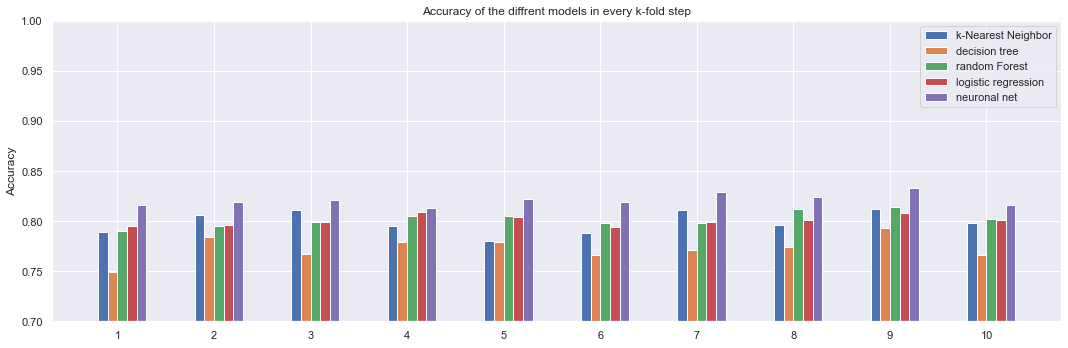

In [36]:
# print accuracy of each k-fold step
plt.figure(figsize=(15,5))
ax = plt.subplot()
width = 0.1

X_label = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
_X = np.arange(len(X_label))

ax.bar(_X, accuracy_kNeighbor_1, width, label='k-Nearest Neighbor')
ax.bar(_X + width, accuracy_decisionTree_1, width, label='decision tree')
ax.bar(_X + (2*width), accuracy_randomForest_1, width, label='random Forest')
ax.bar(_X + (3*width), accuracy_logisticRegression_1, width, label='logistic regression')
ax.bar(_X + (4*width), accuracy_neuronalNet_1, width, label='neuronal net')

ax.set_ylabel('Accuracy')
ax.set_ylim(0.7,1)
ax.set_xticks(_X + width + width/2)
ax.set_xticklabels(X_label)
ax.set_title('Accuracy of the diffrent models in every k-fold step')
ax.legend()

plt.tight_layout()

plt.show()

In [37]:
# calculate average accuracy
avg_kNeighbor_1 = np.mean(accuracy_kNeighbor_1, axis=0)
avg_decisionTree_1 = np.mean(accuracy_decisionTree_1, axis=0)
avg_randomForest_1 = np.mean(accuracy_randomForest_1, axis=0)
avg_logisticRegression_1 = np.mean(accuracy_logisticRegression_1, axis=0)
avg_neuronalNet_1 = np.mean(accuracy_neuronalNet_1, axis=0)

In [38]:
# print average accuracy
print(f'k-Nearest Neighbor: {avg_kNeighbor_1}')
print(f'Decision Tree: {avg_decisionTree_1}')
print(f'Random Forest: {avg_randomForest_1}')
print(f'Logistic Regression: {avg_logisticRegression_1}')
print(f'Neuronal Net: {avg_neuronalNet_1}')

k-Nearest Neighbor: 0.7989397260677034
Decision Tree: 0.7731401438806585
Random Forest: 0.8018630681790319
Logistic Regression: 0.8008226550738284
Neuronal Net: 0.821225535629343


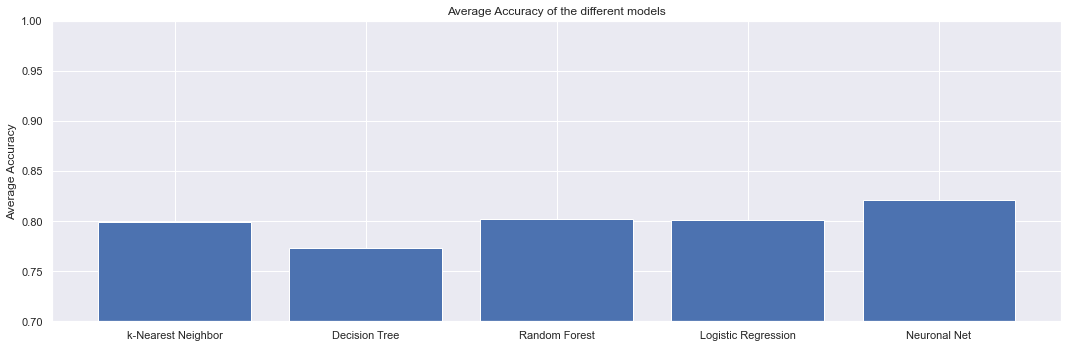

In [39]:
# print average accuracy for each model
plt.figure(figsize=(15,5))
ax = plt.subplot()
models = ['k-Nearest Neighbor', 'Decision Tree', 'Random Forest', 'Logistic Regression', 'Neuronal Net']
avg_accuracies_1 = [avg_kNeighbor_1, avg_decisionTree_1, avg_randomForest_1, avg_logisticRegression_1, avg_neuronalNet_1] 

ax.bar(models, avg_accuracies_1)

ax.set_ylabel('Average Accuracy')
ax.set_ylim(0.7,1)
ax.set_title('Average Accuracy of the different models')

plt.tight_layout()
plt.show()

### approach 2

In [40]:
# define arrays to save the accuracy of every step of k-fold cross validation
accuracy_kNeighbor_2 = []
accuracy_decisionTree_2 = []
accuracy_randomForest_2 = []
accuracy_logisticRegression_2 = []
accuracy_neuronalNet_2 = []

In [41]:
# perform k-fold cross validation
for train_index, test_index in kf.split(X_train_2):
    
        X_train, X_test = X_train_2[train_index], X_train_2[test_index]
        Y_train, Y_test = Y_train_2[train_index], Y_train_2[test_index]
        
    # k-Nearest Neighbors
        # train k-Nearest Neighbor only on training data
        kNeighbor = KNeighborsClassifier(n_neighbors=5).fit(X_train, Y_train)
        # test k-Nearest Neighbor with test data
        kNeighbor_pred = kNeighbor.predict(X_test)
        # calculate accuracy
        kNeighbor_accuracy = accuracy_score(Y_test, kNeighbor_pred)
        print(f'k-Nearest Neighbor: {kNeighbor_accuracy}')
        accuracy_kNeighbor_2.append(kNeighbor_accuracy)
        
    # Decision Tree
        # train decision tree only on training data
        decisionTree = DecisionTreeClassifier(random_state=0, criterion = 'entropy').fit(X_train, Y_train)
        # test decision tree with test data
        decisionTree_pred = decisionTree.predict(X_test)
        # calculate accuracy
        decisionTree_accuracy = accuracy_score(Y_test, decisionTree_pred)
        print(f'Decision Tree: {decisionTree_accuracy}')
        accuracy_decisionTree_2.append(decisionTree_accuracy)
        
    # Random Forest
        # train random forest only on training data
        randomForest = RandomForestClassifier(max_depth=2, random_state=0).fit(X_train, Y_train)
        # test random forest with test data
        randomForest_pred = randomForest.predict(X_test)
        # calculate accuracy
        randomForest_accuracy = accuracy_score(Y_test, randomForest_pred)
        print(f'Random Forest: {randomForest_accuracy}')
        accuracy_randomForest_2.append(randomForest_accuracy)
        
    # Logistic Regression
        # train logistic regression only on training data
        logisticRegression = LogisticRegression(random_state=0, max_iter=500).fit(X_train, Y_train)
        # test logistic regression with test data
        logisticRegression_pred = logisticRegression.predict(X_test)
        # calculate accuracy
        logisticRegression_accuracy = accuracy_score(Y_test, logisticRegression_pred)
        print(f'Logistic Regression: {logisticRegression_accuracy}')
        accuracy_logisticRegression_2.append(logisticRegression_accuracy)
        
    #Neuronal Net
        # train neuronal net only on training data
        neuronalNet = MLPClassifier(random_state=1, max_iter=500).fit(X_train, Y_train)
        # test neuronal net with test data
        neuronalNet_pred = neuronalNet.predict(X_test)
        # calculate accuracy
        neuronalNet_accuracy = accuracy_score(Y_test, neuronalNet_pred)
        print(f'Neuronal Net: {neuronalNet_accuracy}')
        accuracy_neuronalNet_2.append(neuronalNet_accuracy)
        print('\n')

k-Nearest Neighbor: 0.8073394495412844
Decision Tree: 0.7811926605504587
Random Forest: 0.8018348623853211
Logistic Regression: 0.8009174311926606
Neuronal Net: 0.8178899082568807


k-Nearest Neighbor: 0.8068807339449541
Decision Tree: 0.7967889908256881
Random Forest: 0.7922018348623853
Logistic Regression: 0.8077981651376147
Neuronal Net: 0.8252293577981651


k-Nearest Neighbor: 0.8004587155963303
Decision Tree: 0.7779816513761468
Random Forest: 0.7986238532110091
Logistic Regression: 0.8105504587155963
Neuronal Net: 0.8146788990825689


k-Nearest Neighbor: 0.8045871559633028
Decision Tree: 0.791743119266055
Random Forest: 0.8169724770642202
Logistic Regression: 0.8119266055045872
Neuronal Net: 0.8330275229357799


k-Nearest Neighbor: 0.8096330275229358
Decision Tree: 0.7986238532110091
Random Forest: 0.8201834862385321
Logistic Regression: 0.8155963302752294
Neuronal Net: 0.8353211009174312


k-Nearest Neighbor: 0.7770642201834862
Decision Tree: 0.7706422018348624
Random Forest: 0.7

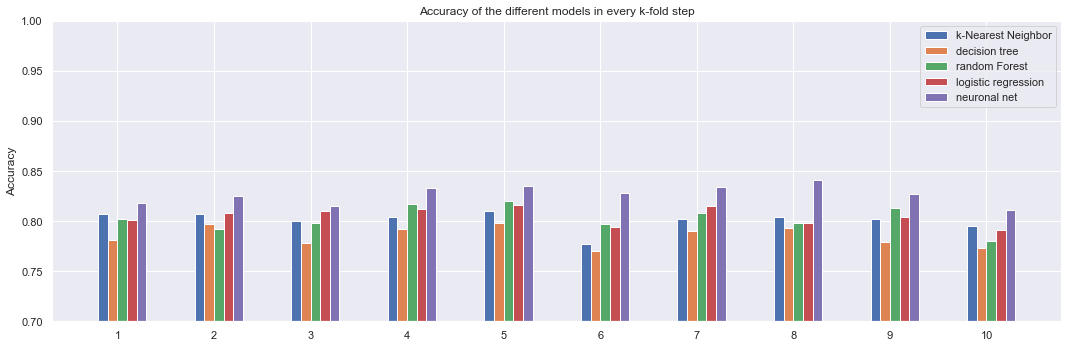

In [42]:
# print accuracy of each k-fold step
plt.figure(figsize=(15,5))
ax = plt.subplot()
width = 0.1

X_label = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
_X = np.arange(len(X_label))

ax.bar(_X, accuracy_kNeighbor_2, width, label='k-Nearest Neighbor')
ax.bar(_X + width, accuracy_decisionTree_2, width, label='decision tree')
ax.bar(_X + (2*width), accuracy_randomForest_2, width, label='random Forest')
ax.bar(_X + (3*width), accuracy_logisticRegression_2, width, label='logistic regression')
ax.bar(_X + (4*width), accuracy_neuronalNet_2, width, label='neuronal net')

ax.set_ylabel('Accuracy')
ax.set_ylim(0.7,1)
ax.set_xticks(_X + width + width/2)
ax.set_xticklabels(X_label)
ax.set_title('Accuracy of the different models in every k-fold step')
ax.legend()

plt.tight_layout()

plt.show()

In [43]:
# calculate average accuracy
avg_kNeighbor_2 = np.mean(accuracy_kNeighbor_2, axis=0)
avg_decisionTree_2 = np.mean(accuracy_decisionTree_2, axis=0)
avg_randomForest_2 = np.mean(accuracy_randomForest_2, axis=0)
avg_logisticRegression_2 = np.mean(accuracy_logisticRegression_2, axis=0)
avg_neuronalNet_2 = np.mean(accuracy_neuronalNet_2, axis=0)

In [44]:
# print average accuracy
print(f'k-Nearest Neighbor: {avg_kNeighbor_2}')
print(f'Decision Tree: {avg_decisionTree_2}')
print(f'Random Forest: {avg_randomForest_2}')
print(f'Logistic Regression: {avg_logisticRegression_2}')
print(f'Neuronal Net: {avg_neuronalNet_2}')

k-Nearest Neighbor: 0.8010456568327362
Decision Tree: 0.7852189582798272
Random Forest: 0.8025587025443033
Logistic Regression: 0.8049445499366344
Neuronal Net: 0.8267344670352111


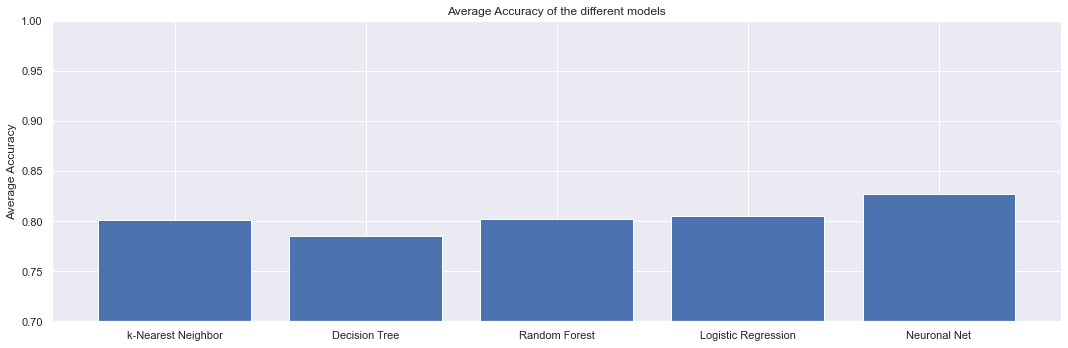

In [45]:
# print average accuracy of each model
plt.figure(figsize=(15,5))
ax = plt.subplot()
models = ['k-Nearest Neighbor', 'Decision Tree', 'Random Forest', 'Logistic Regression', 'Neuronal Net']
avg_accuracies_2 = [avg_kNeighbor_2, avg_decisionTree_2, avg_randomForest_2, avg_logisticRegression_2, avg_neuronalNet_2] 

ax.bar(models, avg_accuracies_2)

ax.set_ylabel('Average Accuracy')
ax.set_ylim(0.7,1)
ax.set_title('Average Accuracy of the different models')

plt.tight_layout()
plt.show()

### compare approaches

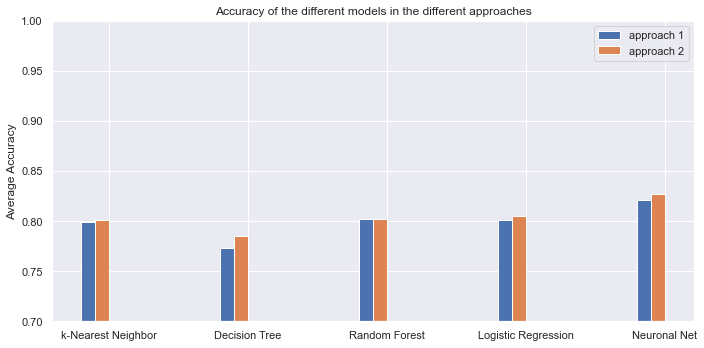

In [46]:
# print average accuracy of each approach
plt.figure(figsize=(10,5))
ax = plt.subplot()
width = 0.1

X_label = ['k-Nearest Neighbor', 'Decision Tree', 'Random Forest', 'Logistic Regression', 'Neuronal Net']
_X = np.arange(len(X_label))

ax.bar(_X, avg_accuracies_1, width, label='approach 1')
ax.bar(_X + width, avg_accuracies_2, width, label='approach 2')

ax.set_ylabel('Average Accuracy')
ax.set_ylim(0.7,1)
ax.set_xticks(_X + width + width/2)
ax.set_xticklabels(X_label)
ax.set_title('Accuracy of the different models in the different approaches')
ax.legend()

plt.tight_layout()

plt.show()

## train a neuronal net

### approach 1

In [47]:
# Neuronal Net
neuronalNet_1 = MLPClassifier(random_state=1, max_iter=500).fit(X_train_1, Y_train_1)
neuronalNet_pred_1 = neuronalNet.predict(X_test_1)
neuronalNet_accuracy_1 = accuracy_score(Y_test_1, neuronalNet_pred_1)
print('Approach 1')
print(f'Neuronal Net: {neuronalNet_accuracy_1}')

Approach 1
Neuronal Net: 0.8282726724311281


### approach 2

In [48]:
# Neuronal Net
neuronalNet_2 = MLPClassifier(random_state=1, max_iter=500).fit(X_train_2, Y_train_2)
neuronalNet_pred_2 = neuronalNet.predict(X_test_2)
neuronalNet_accuracy_2 = accuracy_score(Y_test_2, neuronalNet_pred_2)
print('Approach 2')
print(f'Neuronal Net: {neuronalNet_accuracy_2}')

Approach 2
Neuronal Net: 0.827435276587819


# evaluation

## approach 1

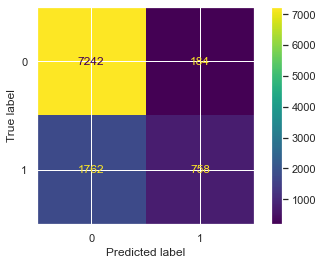

In [49]:
plot_confusion_matrix(neuronalNet_1, X_test_1, Y_test_1)  
plt.show() 

## approach 2

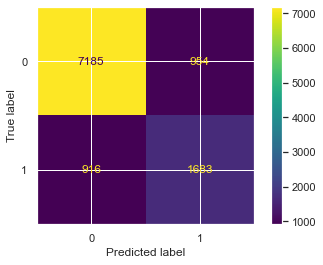

In [50]:
plot_confusion_matrix(neuronalNet_2, X_test_2, Y_test_2)  
plt.show() 

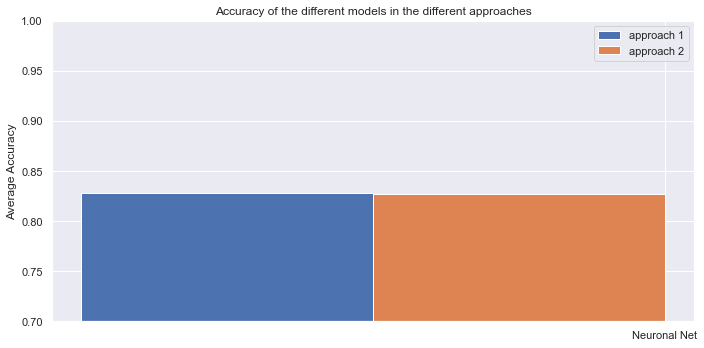

In [51]:
# interpret  model results and provide recommmendations
# print accuracy of each approach
plt.figure(figsize=(10,5))
ax = plt.subplot()
width = 0.1

X_label = ['Neuronal Net']
_X = np.arange(len(X_label))

ax.bar(_X, neuronalNet_accuracy_1, width, label='approach 1')
ax.bar(_X + width, neuronalNet_accuracy_2, width, label='approach 2')

ax.set_ylabel('Average Accuracy')
ax.set_ylim(0.7,1)
ax.set_xticks(_X + width + width/2)
ax.set_xticklabels(X_label)
ax.set_title('Accuracy of the different models in the different approaches')
ax.legend()

plt.tight_layout()

plt.show()